In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# function
_w = [0.0, -1.0, 0.0, 1.0]
f = lambda x: _w[3]*x**3 + _w[2]*x**2 + _w[1]*x + _w[0]

In [3]:
x_train = np.linspace(-1.5, 1.5, 100)
fx = f(x_train)

In [4]:
np.random.seed(320)
y_train = fx + 0.7 * np.random.rand(len(x_train))

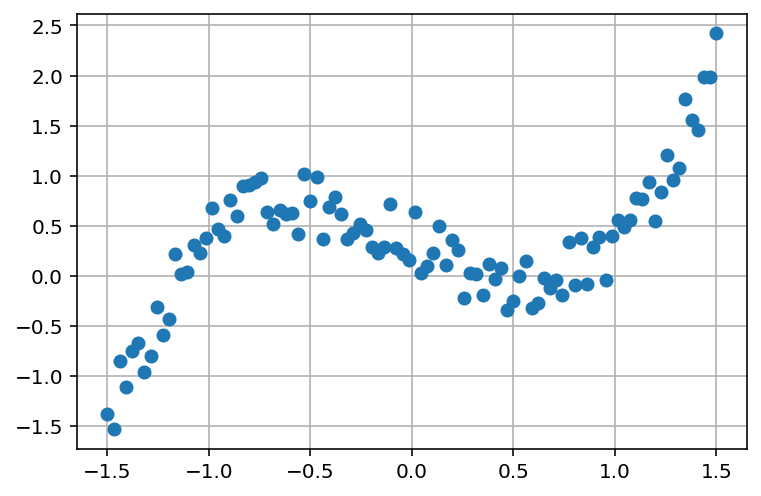

In [5]:
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [9]:
W = tf.Variable(np.array([[-1.0, -1.0, -1.0, -1.0]]), dtype=tf.float32)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

loss = tf.reduce_mean(tf.square(tf.matmul(W, x) - y))

lr = 0.01
MaxEpochs = 1000
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

feature_train = np.array([[1, xval, xval**2, xval**3] for xval in x_train]).T
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        if epoch % 100 == 0:
            curr_w, curr_loss = sess.run([W, loss], feed_dict={x: feature_train, y: y_train})
            print(epoch, curr_w, curr_loss)
        sess.run(train, feed_dict={x: feature_train, y: y_train})
        
    w_final = sess.run(W)
    print(w_final)

0 [[-1. -1. -1. -1.]] 11.816359
100 [[ 0.182424   -0.25240687  0.09408027  0.49915412]] 0.12510161
200 [[ 0.2500748  -0.3740917   0.08682641  0.5916992 ]] 0.09524448
300 [[ 0.2737109  -0.4815673   0.06551292  0.6608848 ]] 0.07784483
400 [[ 0.287283   -0.5717455   0.05244779  0.71884906]] 0.06597137
500 [[ 0.29531014 -0.6473772   0.04469831  0.7674627 ]] 0.05774721
600 [[ 0.30006394 -0.710809    0.04010834  0.80823463]] 0.052007075
700 [[ 0.30287948 -0.7640087   0.03738986  0.8424297 ]] 0.04798515
800 [[ 0.304547   -0.80862683  0.03577982  0.8711088 ]] 0.045161627
900 [[ 0.30553463 -0.846048    0.03482623  0.8951619 ]] 0.043177467
[[ 0.30611962 -0.8774326   0.03426141  0.91533494]]


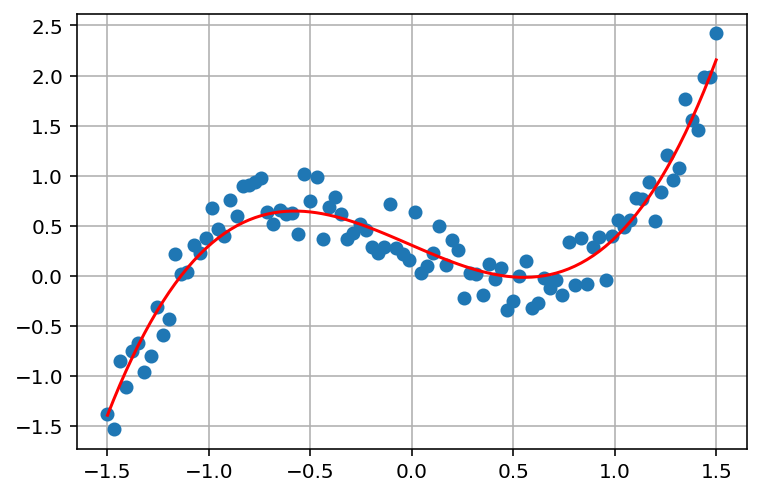

In [10]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, np.dot(w_final, feature_train).flatten(), 'r-')
plt.grid()
plt.show()